In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import svm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/anmolukhare/Downloads/classification_data.tsv', sep='\t')

In [3]:
df.head()

,Red,Green,Blue,Class
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110508e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1033d4080>]], dtype=object)

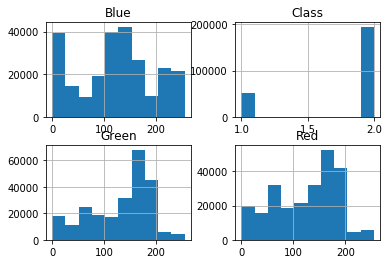

In [4]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c995be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cba6828>]], dtype=object)

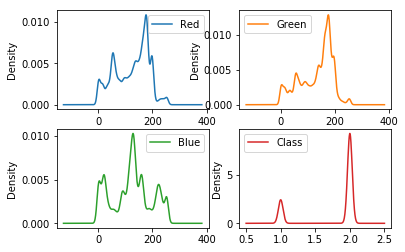

In [5]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)

In [6]:
corrmat = df.corr()
print("Correlation matrix: ")
corrmat

Correlation matrix: 


,Red,Green,Blue,Class
Red,1.000000,0.855250,0.496376,0.092030
Green,0.855250,1.000000,0.660098,-0.120327
Blue,0.496376,0.660098,1.000000,-0.569958
Class,0.092030,-0.120327,-0.569958,1.000000


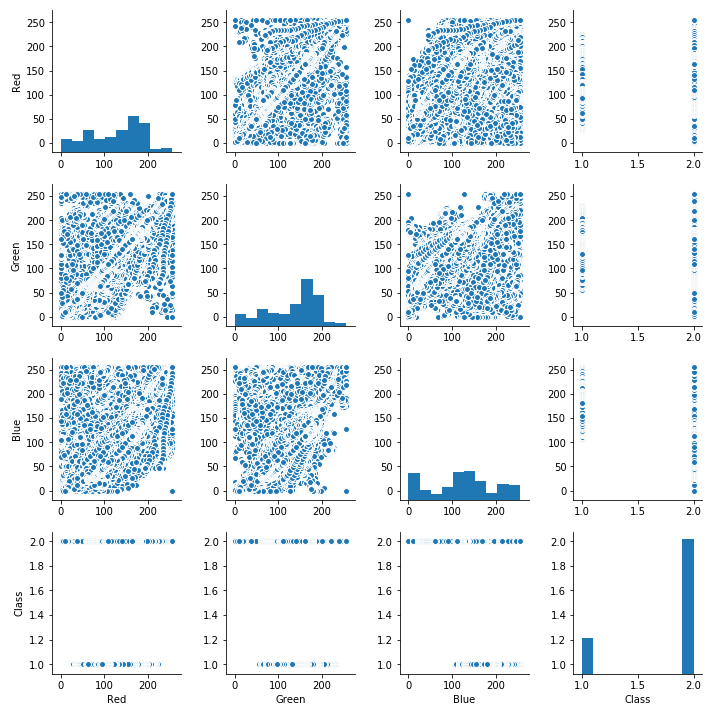

In [7]:
sns.pairplot(df)

In [8]:
X = df.iloc[:, :3]
y = df.iloc[:, 3]
temp = X.values
min_max_scaler = preprocessing.MinMaxScaler()
temp_scaled = min_max_scaler.fit_transform(temp)
X = pd.DataFrame(temp_scaled)

In [9]:
pca = PCA(n_components = 2)
pca.fit(X)
X_2d = pca.transform(X)
normalized0 = (X_2d[:,0]-min(X_2d[:,0]))/(max(X_2d[:,0])-min(X_2d[:,0]))
normalized1 = (X_2d[:,1]-min(X_2d[:,1]))/(max(X_2d[:,1])-min(X_2d[:,1]))
X_2d[:,0] = normalized0 + 3
X_2d[:,1] = normalized1 + 3

In [10]:
def graph(model, pred):    
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    f, ax = plt.subplots(figsize = (12,9))
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    plt.contourf(xx, yy, pred, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with linear kernel')
    plt.show()

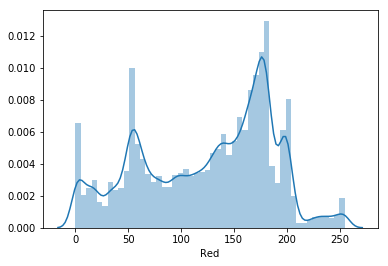

In [11]:
#X.columns = ['Red', 'Green', 'Blue']
sns.distplot(df['Red'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size = 0.2, random_state = 1)

# Logistic Regression

In [13]:
logreg = LogisticRegression(penalty = 'l1', C = 1)
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_test)

In [14]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = lr_pred)
conf_mat

array([[ 5900,  4385],
       [ 2092, 36635]])

In [15]:
scores = cross_val_score(logreg, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.882 (+/- 0.109)


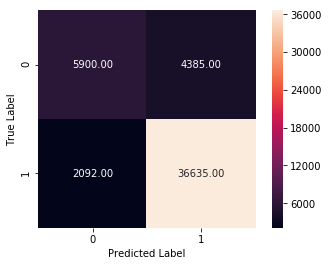

In [16]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

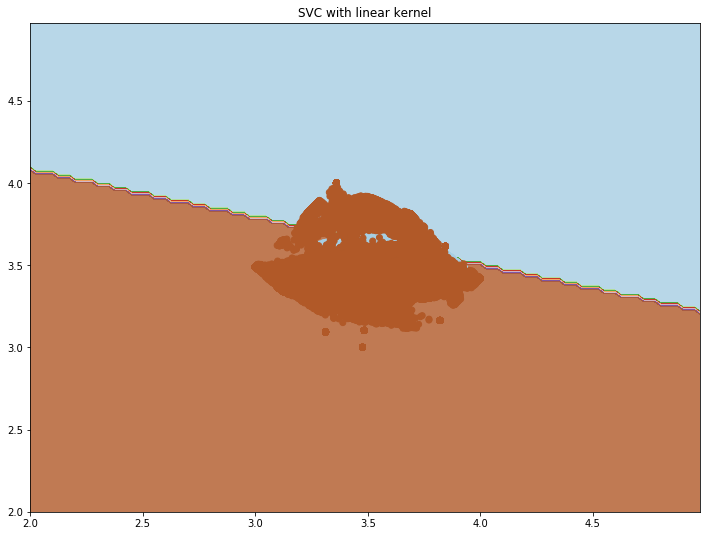

In [17]:
graph(logreg, lr_pred)

# Soft Margin SVM

In [18]:
ssvml_clf = svm.SVC(kernel = 'linear')
ssvml_clf.fit(X_train, y_train)
ssvml_pred = ssvml_clf.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred = ssvml_pred)
conf_mat

array([[ 9862,   423],
       [ 3141, 35586]])

In [19]:
scores = cross_val_score(ssvml_clf, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.928 (+/- 0.082)


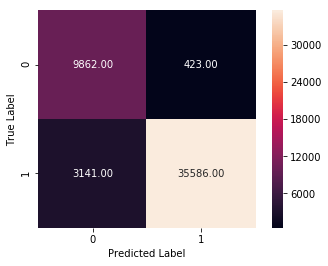

In [20]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

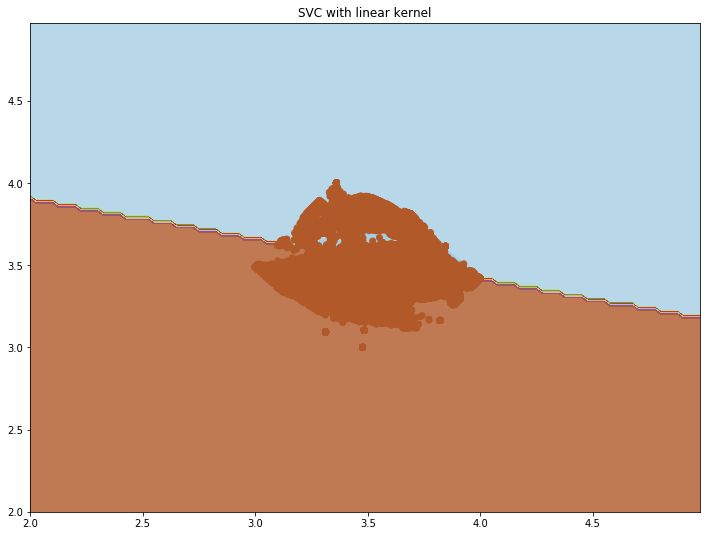

In [21]:
graph(ssvml_clf, ssvml_pred)

In [22]:
ssvmp_clf = svm.SVC(kernel = 'poly', gamma = 5)
ssvmp_clf.fit(X_train, y_train)
ssvmp_pred = ssvmp_clf.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred = ssvmp_pred)
conf_mat

array([[ 8581,  1704],
       [ 1850, 36877]])

In [23]:
scores = cross_val_score(ssvmp_clf, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.921 (+/- 0.091)


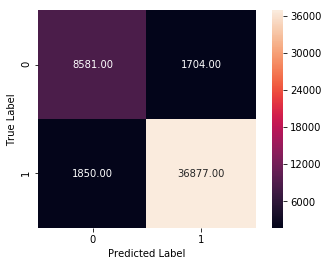

In [24]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

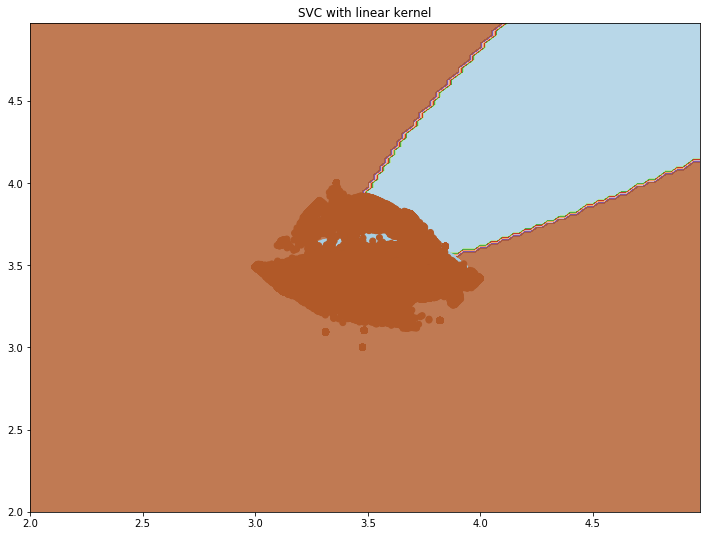

In [25]:
graph(ssvmp_clf, ssvmp_pred)

In [26]:
ssvmg_clf = svm.SVC(kernel = 'rbf', gamma = 5)
ssvmg_clf.fit(X_train, y_train)
ssvmg_pred = ssvmg_clf.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred = ssvmg_pred)
conf_mat

array([[10261,    24],
       [  972, 37755]])

In [27]:
scores = cross_val_score(ssvmg_clf, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.967 (+/- 0.041)


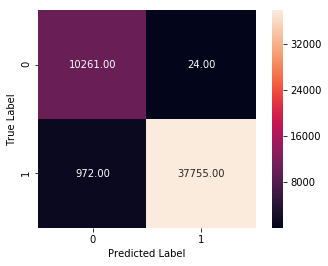

In [28]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

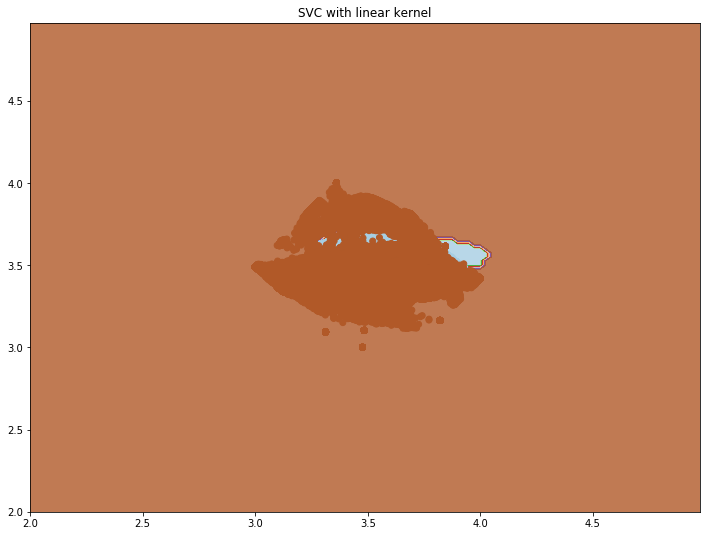

In [29]:
graph(ssvmg_clf, ssvmg_pred)

# Hard Margin SVM

In [30]:
hsvml_clf = svm.SVC(kernel = 'linear', C = 10000, max_iter = 10000)
hsvml_clf.fit(X_train, y_train)
hsvml_pred = hsvml_clf.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred = hsvml_pred)
conf_mat

array([[ 6501,  3784],
       [ 8977, 29750]])

In [31]:
scores = cross_val_score(hsvml_clf, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.652 (+/- 0.477)


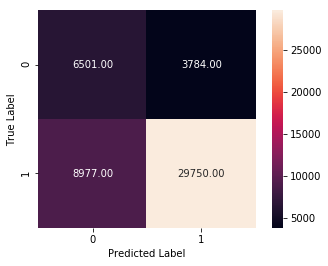

In [32]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

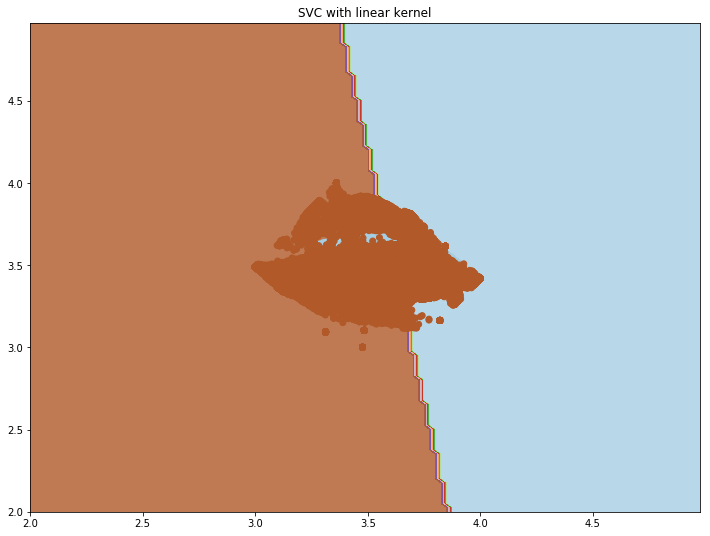

In [33]:
graph(hsvml_clf, hsvml_pred)

In [34]:
hsvmp_clf = svm.SVC(kernel = 'poly', C = 1000, max_iter = 100)
hsvmp_clf.fit(X_train, y_train)
hsvmp_pred = hsvmp_clf.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred = hsvmp_pred)
conf_mat

array([[ 2356,  7929],
       [35535,  3192]])

In [35]:
scores = cross_val_score(hsvmp_clf, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.686 (+/- 0.292)


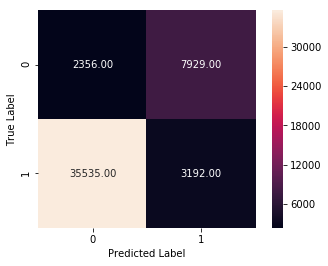

In [36]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

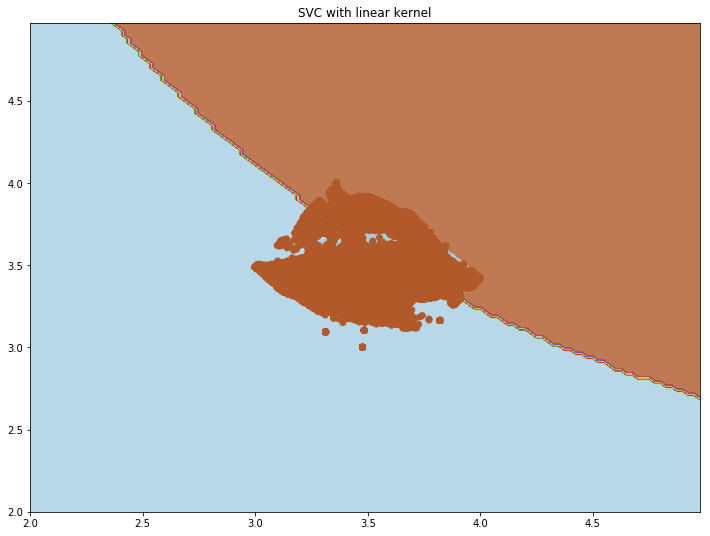

In [37]:
graph(hsvmp_clf, hsvmp_pred)

In [38]:
hsvmg_clf = svm.SVC(kernel = 'rbf', C = 10000, max_iter = 10000)
hsvmg_clf.fit(X_train, y_train)
hsvmg_pred = hsvmg_clf.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred = hsvmg_pred)
conf_mat

array([[ 2268,  8017],
       [12816, 25911]])

In [39]:
scores = cross_val_score(hsvmg_clf, X_2d, y, cv = 5)
print('Accuracy: %.3f (+/- %.3f)'%(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.585 (+/- 0.354)


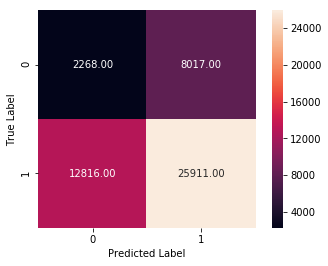

In [40]:
hm = sns.heatmap(conf_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

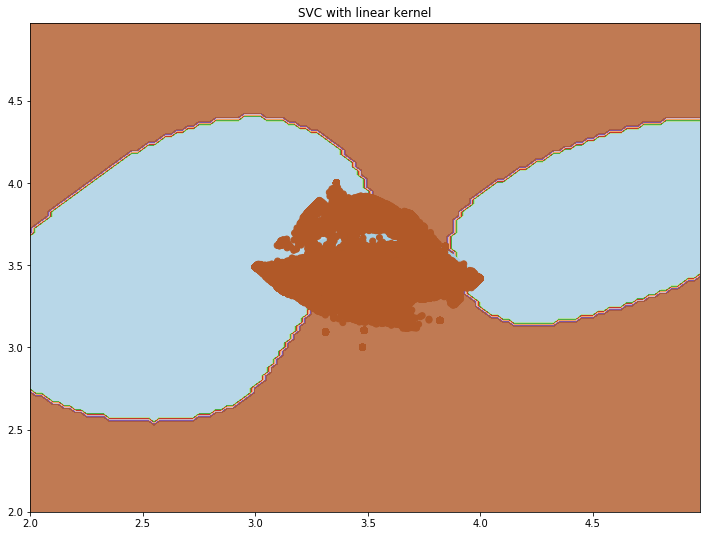

In [41]:
graph(hsvmg_clf, hsvmg_pred)